<a href="https://colab.research.google.com/github/Adrianxwu/MDO-ML-IVC-ITB-2021/blob/main/Tutorial_Gradient_based_Optimization_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUTORIAL 1: GRADIENT-BASED OPTIMIZATION TECHNIQUES**
**Multidisciplinary Optimization and Machine Learning for Engineering Design International Virtual Course**

**19 July - 5 August 2021**

Written by: Kemas Zakaria

Based on the lecture material by: Koji Shimoyama, Ph.D. (Tohoku University, Japan)





Please run the following code first to import all required packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


---
---
## Quick Review
In this section, we will do a quick review of some existing gradient-based techniques. The outline of this section is as follows:

*   Gradient Descent Method
*   Quasi-Newton Method
*   Active Set Method 

---
---
## Gradient Descent Method
The gradient descent method (or also called the steepest descent method) is one of the simplest gradient-based optimization methods. The method uses the first-order derivative to find the nearest local minima of a differentiable function. The general idea is to take repeated steps in the opposite direction of the gradient of the function (hence, the name "descent")

The formulation of the gradient descent method is as follows:

Given the following optimization problem

  minimize $f(\mathbf{x})$

  over $ \mathbf{x} \in \mathbb{R}^n$

where $ f: \mathbb{R}^n \rightarrow \mathbb{R} $ is the objective function that maps input variables to the objective value. Note that no constraint is involved. The iterative steps in the gradient descent method is computed as follows:

 $\mathbf{x}_{k+1} = \mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_k) $ 

where $k$ is the iteration index of the optimization process and $\alpha$ is the learning rate of the optimization process. One important thing to notice is the negative sign given to the first derivative. The negative sign ensures that the iterative steps are performed so that process approaches the nearest local minimum. The learning rate $\alpha$ here indicates how large the steps are taken during the optimization process. Starting from an initial guess $\mathbf{x}_0$, at each iteration the value of $f(\mathbf{x}_k)$ will approach the actual value of a local minimum in the function.




---
---
### Gradient Descent Method Code

In this section, we are going to use python to perform the gradient descent method on analytical problems. The nice thing is that we can visualize the optimization process so you can observe how the method descends toward the optimum point.

First, please execute the following cell to define our gradient descent method in Python:

In [ ]:
def grad_descent(
    grad, initial_point, learn_rate, dimen, n_iter = 100, tol = 1e-06
):
    x_point = np.zeros(shape=[n_iter, dimen])
    x_point[0, :] = initial_point
    for i in range(n_iter):
      
      delta = -learn_rate*grad(x_point[i,:])
      
      grad_check = np.sum(np.abs(grad(x_point[i, :])))

      if (grad_check <= tol) or i == n_iter-1:
        
        class result:
          def __init__(self):
            self.opt_x = x_point[i,:].reshape([1,dimen])
            self.traject = x_point
            self.iter = i+1

        def get_result():
          return result()

        output = get_result()
        break
      else:
        x_point[i+1,:] = x_point[i,:] + delta        
      
    return output

The required inputs for the gradient descent method are the following:


1.   The derivative of the problem's function
2.   The initial point for optimization
3.   The learning rate for optimization
4.   The dimensionality of the problem
5. The number of iteration performed, or 
6. The amount tolerance allowed 

The function will output the optimum point $\mathbf{x}_{opt}$



---
### Examples #1: Parabolic Function
The parabolic function is a convex function that has a single optimum (i.e., it is a unimodal function). The purpose of this example is to show how a gradient-based optimization method works in discovering the optimum point. The equation used in this example is $ f(x) = x^{2} $. Remember that the gradient of $x^{2}$ is $df(x)/dx = 2x$, this is the information that you need to apply the gradient descent method.

Let's try to solve $f(x) = x^{2}$ using gradient descend by executing the following code:

(you can also try varying the initial point and the learning rate to see how they would affect the optimization process)

Optimum Value of f(x) and Optimum Point x
f(x) = [[2.4286103e-13]]
x = [[-4.92809325e-07]]

 The blue dot represents the initial point

 The green dots represent the optimization trajectory

 The red dot represents the obtained minimum value


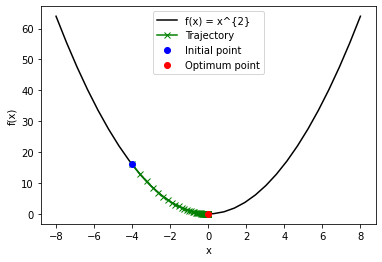

Total Iteration: 
152


In [ ]:
init_x = -4 # Initial solution, the default value is set to init_x = -4

# Solving the parabolic problem by using gradient descent
# learn_rate is set to 0.05 for the default value
output  = grad_descent(
    grad=lambda x: 2*x, initial_point=init_x, learn_rate=0.05, n_iter = 1000, dimen = 1
)

# Preprocessing the result
opt_point = output.opt_x
traject = output.traject

initial_point = init_x
opt_f = np.power(opt_point, 2)
initial_f = np.power(initial_point, 2)
traject_f = np.power(output.traject, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
print(txt_f.format(opt_f))
print(txt_x.format(opt_point))
print("\n The blue dot represents the initial point")
print("\n The green dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting the Results
Xplot = np.linspace(-8, 8, 30)
Yplot = np.power(Xplot, 2)
plt.plot(Xplot, Yplot, 'k')
plt.plot(output.traject[0:output.iter], traject_f[0:output.iter], 'gx-')
plt.plot(initial_point, initial_f, 'bo')
plt.plot(opt_point, opt_f, 'ro')
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(['f(x) = x^{2}','Trajectory','Initial point','Optimum point'])
plt.show()

print("Total Iteration: ")
print(output.iter)

---
### Examples #2: Rosenbrock Function (2 Dimensional)
The Rosenbrock function is a non-convex function firstly introduced by Howard H. Rosenbrock in 1960. This function is a popular test problem for gradient-based optimization algorithms. The Rosenbrock function takes two input variables, that is, $x_{1}$, and $x_{2}$. Even though the function is unimodal, which means that there is only one optimum point, the convergence to the minimum point is notably difficult.

The Rosenbrock function is expressed as:

$ f(x_{2}, x_{1}) = 100(x_{2} - x_{1}^{2})^{2} + (x_{1} -1 )^{2} $

With the input domain usually evaluated at

$ x_{1} ∈ [-5,10], x_{2} ∈ [-5,10] $

Notice that for the sake of stability, we divide the above equation by a factor of 100.

The following cell defines the Rosenbrock function:


In [ ]:
def rosenbrock(x, scale = 100):
  x_shape = x.shape
  f = np.zeros(shape = [x_shape[0]])
  for i in range(x_shape[0]):
    f[i] = 100*(x[i,1]-x[i,0]**2)**2 + (x[i,0]-1)**2
    f[i] = f[i]/scale
  return f

Since we need gradient information to use the gradient descent method, the derivatives for Rosenbrock are given as follows:

$ \frac{\partial f}{\partial x_{1}} = -400x_{1}(x_{2} - x_{1}^{2}) +2(x_{1}-1) $

$ \frac{\partial f}{\partial x_{2}} = 200(x_{2} - x_{1}^{2}) $

In [ ]:
def grad_rosenbrock(x, scale = 100):

  f1 = -400*x[0]*(x[1]-x[0]**2) + 2*(x[0]-1)
  f2 = 200*(x[1]-x[0]**2)
  df = np.array([f1, f2])
  df = df/scale
  return df

Next we are going to find the global minimum of the two-dimensional Rosenbrock function. The global minimum of the Rosenbrock function is located at $ x^{*} = (1,1)$, which yields $f(x^{*}) = 0 $.

Optimum Value of f(x) and Optimum Point x
f(x) = [0.01237446]
x = [[2.11212622 4.4635702 ]]
df(x) = [0.00118002 0.00498609]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value


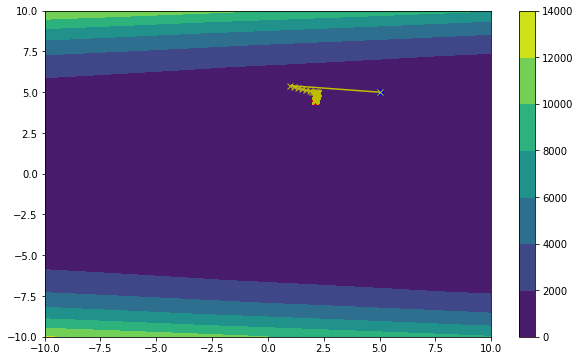

Total Iteration: 
10000


In [ ]:
init_x = np.array([5, 5]) # Initial point, the default value is init_x = np.array([5, 5]) 

# Solving the Rosenbrock problem by using gradient descent
# learn_rate is set to 1e-02
opt_rosenbrock = grad_descent(
    grad = grad_rosenbrock, initial_point = init_x, learn_rate = 1e-02, dimen = 2, n_iter = 10000, tol = 1e-03
)

# Pre-processing the result
opt_x = opt_rosenbrock.opt_x
f_rosenbrock = rosenbrock(opt_rosenbrock.opt_x)
traject_f = rosenbrock(opt_rosenbrock.traject)
df_opt = grad_rosenbrock(opt_x.reshape(2))

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(f_rosenbrock))
print(txt_x.format(opt_rosenbrock.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting the results
nplot = 30;
X = np.linspace(-10, 10, num=nplot)
Y = np.linspace(-10, 10, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])


for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = rosenbrock(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
cbarf = plt.colorbar(cf)
plt.plot(opt_rosenbrock.opt_x[0,0], opt_rosenbrock.opt_x[0,1], 'ro')
plt.plot(init_x[0], init_x[1] , 'bo')

iter = opt_rosenbrock.iter
plt.plot(opt_rosenbrock.traject[0:iter,0], opt_rosenbrock.traject[0:iter,1], 'yx-')
plt.rcParams["figure.figsize"] = (16, 9)
plt.show()

print("Total Iteration: ")
print(opt_rosenbrock.iter)

Can you find the global optimum? Looks a bit hard, wasn't it?

---
### Examples #3: Styblinski-Tang Function (two-dimensional, multimodal)
Styblinski-Tang function will be used to show how initial point determine the optimization results.

The Styblinski-Tang Function is expressed as:

$ f({x}) = 0.5 \Sigma_{i=1}^{d} (x_{i}^4 -16x_{i}^2 + 5x_{i} ),$

with the input domain is usually defined as follows:

$ x_{1, ..., d} ∈ [-5,5]  $

The following cell defines the Styblinski-Tang Function in Python:

In [ ]:
def styblinski(input, dimen = 2):
  input_shape = input.shape

  if input.ndim == 1:
    nn = input_shape[0]/dimen
    
    x = input.reshape(int(nn), dimen)
  else:
    x = input
    
  x_shape = x.shape
  f = np.zeros(shape = [x_shape[0]])
  for i in range(x_shape[0]):
    temp = 0
    for j in range(x_shape[1]):
      temp = temp + x[i,j]**4 - 16*x[i,j]**2 + 5*x[i,j]
    f[i] = temp/2

  return f

Since we need gradient information to use gradient descent method, the derivatives for Styblinski-Tang are given as follows:

$ \frac{\partial f}{\partial x_{i}} = 0.5(4 x_{i}^3 - 32x_{i} + 5) $



In [ ]:
def grad_styblinski(input, dimen = 2):
  x_shape = input.shape
  
  x = input.reshape(dimen)

  df = np.zeros(shape = [x_shape[0], dimen])

  for i in range(x_shape[0]):
    for j in range(dimen):
      df[i,j] = 0.5*(4*x[j]**3 -32*x[j] +5)

  output = np.array([df[0, 0], df[0, 1]])
  return output

# Let's give it a try
x = np.array([2.5, 2.5])
print(x)
dff = grad_styblinski(x)
print(dff)

[2.5 2.5]
[-6.25 -6.25]


Next we are going to find global minimum for this case.

The global minimum is located at $ x^{*} = (-2.903435,-2.903435); f(x^{*}) = -78.332331 $, so let's try our gradient descent on this function.

For this part, you need to change the initial point (```init_x```), try inputting new values until you find the optimum point.

Optimum Value of f(x) and Optimum Point x
f(x) = [-50.05889331]
x = [[2.74680277 2.74680277]]
df(x) = [-5.23813526e-09  1.96013161e-09]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value


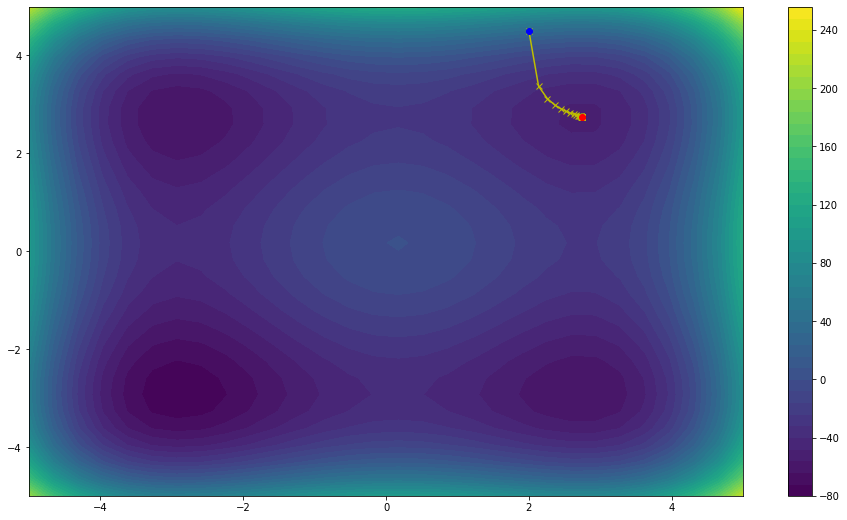

Total Iteration: 
67


In [ ]:
init_x = np.array([2,4.5]) # Initial function, the default value is set to init_x = np.array([2,4.5]), try varying this initial point 

# Solving the Rosenbrock problem by using gradient descent
# learn_rate is set to 1e-02
opt_sty = grad_descent(
    grad = grad_styblinski, initial_point = init_x, learn_rate = 1e-02, dimen = 2, n_iter = 10000, tol = 1e-08
)

# Pre-processing the results
f_sty = styblinski(opt_sty.opt_x)
df_sty = grad_styblinski(opt_sty.opt_x)
traject_f = styblinski(opt_sty.traject)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_sty = "df(x) = {}"
print(txt_f.format(f_sty))
print(txt_x.format(opt_sty.opt_x))
print(txt_df_sty.format(df_sty))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting the results
nplot = 30;
X = np.linspace(-5, 5, num=nplot)
Y = np.linspace(-5, 5, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])


for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = styblinski(XY)

cf = plt.contourf(Xplot, Yplot, Zplot, 50)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()
plt.plot(opt_sty.traject[0:iter,0], opt_sty.traject[0:iter,1], 'yx-')
plt.plot(opt_sty.opt_x[0,0], opt_sty.opt_x[0,1], 'ro')
plt.plot(init_x[0], init_x[1], 'bo')
iter = opt_sty.iter

plt.rcParams["figure.figsize"] = (16, 9)
plt.show()

print("Total Iteration: ")
print(iter)

---
---
## Quasi-Newton Method
Before we start introducing the Quasi-Newton method, let's take look at Newton's method first. Newton's method, or also known as the Newton-Rhapson method, is a method to find roots (or zeroes) of a real-valued function by exploiting the first derivative of the function. The Newton's method can be formulated as follows:

Given the function $f(\mathbf{x})$ and initial guess $\mathbf{x}_0$, we can find the roots of function $f(\mathbf{x})$ by repeating the following steps.

$ \mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{J}_f(\mathbf{x}_k)^{-1} f(\mathbf{x}_k) $

where $\mathbf{J}_f$ is the jacobian matrix of function $f(\mathbf{x})$ and $k$ is the iteration indices which starts at $k= 0$.

You might notice that the Newton's method is not an optimization method per se, but rather a root-finding method of a function. However, since the local minima of a function are located in zero-valued derivatives, we can change the above formulation to find the roots of the derivatives, instead of the roots of the initial function. The formulation of this problem becomes

$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{H}_f(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k) $

where $\mathbf{H}_f$ is the Hessian matrix of function $f(\mathbf{x})$ and $ \nabla f(\mathbf{x}) $ is the gradient vector of function $f(\mathbf{x})$. So it is clear that instead of finding roots of the function, we are going to obtain the roots (or zeroes) of the derivatives of the function.

It is obvious from the formulation that the second derivatives of the function are required to compute the Hessian matrix. This problem, in itself, is quite computationally exhausting and not always available in practice. So in this case, we are going to introduce a matrix $\mathbf{B}$ as an approximation of Hessian matrix. The inverse of approximation matrix $\mathbf{B}$ is as follows:

$ \mathbf{B}^{-1}_{k+1} = (\mathbf{I} - \frac{\Delta \mathbf{x}_k \mathbf{y}^{T}_k }{ \mathbf{y}^T_k \Delta \mathbf{x}_k } ) \mathbf{B}^{-1}_k (\mathbf{I} - \frac{\mathbf{y}_k \Delta \mathbf{x}^{T}_k }{ \mathbf{y}^T_k \Delta \mathbf{x}_k } ) + \frac{\Delta \mathbf{x}_{k} \Delta \mathbf{x}^T_k} { \mathbf{y}^T_k \Delta \mathbf{x}_k } $ 

where

$ \mathbf{y}_k = \nabla f (\mathbf{x}_{k+1} ) - \nabla f( \mathbf{x}_k ) $

The above approximation formula is also known as Broyden-Fletcher-Goldfarb-Shanno (BFGS) formula. Since the Hessian matrix is approximated, hence the name "Quasi" in the method. The formulation of the Quasi-Newton method becomes

$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \alpha_k \mathbf{B}_k(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k) $

The term $\alpha_k$ here is analogous to learning rate, but unlike the learning rate term in gradient descent method, there are conditions that needs to be satisfied to guarantee that the approximation matrix $\mathbf{B}$ to be positive definite, the so-called Wolfie conditions. The Wolfie conditions are defined as follows:

1. $ f(\mathbf{x}_k + \alpha_{k} \mathbf{p}_k ) \leq f(\mathbf{x}_k) + c_1 \alpha_k \mathbf{p}^T_k \nabla f(\mathbf{x}_k) $

2. $ - \mathbf{p}^T_k \nabla f(\mathbf{x}_k + \alpha_k \mathbf{p}_k ) \leq - c_2 \mathbf{p}^T_k \nabla f(\mathbf{x}_k) $

where, in case of Newton's method, then $ \mathbf{p}_k = \mathbf{H}^{-1} \nabla f(\mathbf{x}_k)$, and $c_1 = 10^{-4}$ and $c_2 = -0.9$. The first inequality is also known as Armijo rule and the second inequality is also known as the curvature condition. 

The optimal criteria (or also known as the Karush-Kuhn-Tucker condition) for the Quasi-Newton method requires its first derivative to be zero. So if $ \mathbf{x}^*$ is a local optimum, then $ \nabla f(\mathbf{x}^*) = \mathbf{0} $

Now that every mathematical term has been defined properly, all that we need to do is setting up the initial guess for the method. Besides the initial point $\mathbf{x}_0$, two other terms need to be initially defined, namely, (1) the initial approximation matrix $\mathbf{B}_0$ and the (2) initial $\alpha_0$. In most cases, it is sufficient to assume that matrix $\mathbf{B}_0 = \mathbf{I}$ and $\alpha_0 = 1$. The method can be worked from the initial guess and then will converge to the nearest local minima. 

---
---


### Quasi-Newton Method Code

The code below is written according to Quasi-Newton method. The required inputs for this method are as follows:

1.   The derivative of the problem's function
2.   The initial point for optimization
3.   The learning rate $\alpha$ for optimization
4.   The number of dimension of the problem
5. The number of iteration performed 
6. The amount of tolerance allowed
7. The Hessian approximation of the functon 
8. The dimension of the problem

The following cell defines our Quasi-Netwon Method code:

In [ ]:
def quasi_newton (
    fun, grad, inv_Hessian, initial_point, dimen, n_iter = 100, init_alpha = 1, tol = 1e-03
):
  x_point = np.zeros(shape = [n_iter, dimen])
  x_point[0, :] = initial_point
  
  for i in range(n_iter):
    
    F = grad(x_point[i, :].reshape(1,dimen))
    Ft = np.transpose(F)
    
    # compute Hessian inverse
    #print("Computing Hessian matrix...")
    if i > 0:
      
      y0 = np.transpose(grad(x_point[i, :].reshape(1,dimen)) - grad(x_point[i-1, :].reshape(1,dimen)))
      Jac_inv = inv_Hessian(del_x, y0, H0, dimen)
      p0 = -1*Jac_inv.dot(Ft)
    else:
      Jac_inv = np.identity(dimen)
      p0 = -1*Jac_inv.dot(Ft)
  
    # set alpha
    #print("Checking alpha for Wolfie conditions...")
    alpha = init_alpha
    x0 = x_point[i, :].reshape(1,dimen)
 
    check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)

    for k in range(10):
      if check == 0:
        alpha = 0.5*alpha
        check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)
      else:
        break

    # compute search direction
    
    del_x = alpha*p0
    del_x = del_x.reshape(1,dimen)
    H0 = Jac_inv

    grad_check = np.sum(np.abs(F))

    if grad_check <= tol or i == n_iter - 1:

      class result:
        def __init__(self):
          self.opt_x = x_point[i, :].reshape([1, dimen])
          self.traject = x_point
          self.iter = i+1
          self.kkt = grad_check

      def get_result():
        return result()

      output = get_result()
      break
    else:
      x_point[i+1, :] = x_point[i ,:] + del_x

  return output

def inv_Hessian_BFGS(
  del_x, y0, H0, dimen  
):

  #print("Hessian matrix is approximated using BFGS method")


  Id = np.identity(dimen)
  term1 = Id - (np.transpose(del_x)*np.transpose(y0))/np.matmul(np.transpose(y0),np.transpose(del_x))

  term2 = Id - (y0*del_x)/np.matmul(np.transpose(y0),np.transpose(del_x))

  term3 = np.transpose(del_x)*del_x

  term5 = np.matmul(np.transpose(y0),np.transpose(del_x))

  H1 = term1*(H0*term2) + term3/term5

  return H1

def check_Wolfie(
    p0, x0, grad, fun, alpha, dimen
):

  # Armijo's Rule
  c1 = 1e-04
  c2 = 0.9
  x1 = x0 + alpha*np.transpose(p0)
  

  F1 = fun(x1.reshape(1,dimen))
  F2 = fun(x0) + c1*alpha*np.matmul(np.transpose(p0),np.transpose(grad(x0)))

  # Curvature Condition
  T1 = np.matmul(-np.transpose(p0), np.transpose(grad(x1)))
  T2 = -c2*np.matmul(np.transpose(p0), np.transpose(grad(x0)))



  if F1 <= F2 and T1 <= T2:
    check = 1
  else:
    check = 0
  
  return check

---
### Example Quasi Newton #1: 2D Parabolic Function

Let's revisit the parabolic function, but now we make it as a two-dimensional function. Just like its one-dimensional counterpart, this function only has one critical point, which is its global minimum. The 2D parabolic function is defined below: 

In [ ]:
def ND_parabolic(
    x, dimen = 2
):
 x_shape = x.shape
 ns = x_shape[0]

 f = np.zeros(shape=[ns, 1]) 
 for i in range(ns):
   temp = 0
   for j in range(dimen):
     temp = temp + x[i,j]**2
   
   f[i, 0] = temp

 return f

# Test
x = np.array([[0, 0], [1, 1]])
f = ND_parabolic(x)

print(x)
print(f)

[[0 0]
 [1 1]]
[[0.]
 [2.]]


The derivatives of the 2D parabolic function is defined below.

In [ ]:
def grad_NDparabolic(
    x, dimen = 2
):
  x_shape = x.shape
  ns = x_shape[0]

  df = np.zeros(shape=[ns, dimen])
  for i in range(ns):
    for j in range(dimen):
       df[i,j] = 2*x[i,j]

  return df

# Test
df = grad_NDparabolic(x)
print(df)


[[0. 0.]
 [2. 2.]]


The global minimum is located at $\mathbf{x^*} = (0,0)$ and $f(\mathbf{x}^*) = 0$.


[[-2  4]]
Optimum Value of f(x) and Optimum Point x
f(x) = [[0.]]
x = [[0. 0.]]
df(x) = [[0. 0.]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value


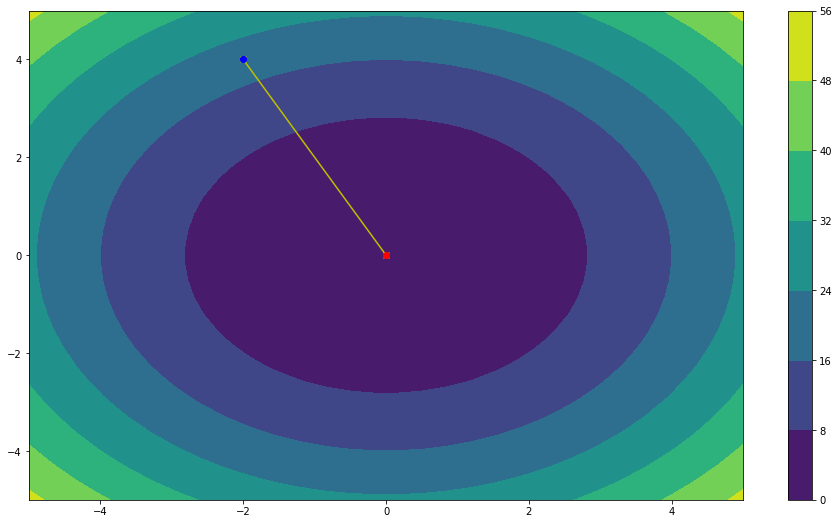

Total Iteration
2


In [ ]:
init_x = np.array([[-2, 4]]) # Initial point
print(init_x)

# Run the quasi-Newton algorithm
output  = quasi_newton (
    fun = ND_parabolic, grad = grad_NDparabolic, inv_Hessian = inv_Hessian_BFGS, initial_point = init_x, dimen = 2, n_iter = 100, init_alpha = 1
)

fopt = ND_parabolic(output.opt_x)
df_opt = grad_NDparabolic(output.opt_x)
traject_f = ND_parabolic(output.traject)
iter = output.iter

fopr = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting Results
nplot = 30;
X = np.linspace(-5, 5, num=nplot)
Y = np.linspace(-5, 5, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = ND_parabolic(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()

plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'bo')


plt.rcParams["figure.figsize"] = (16, 9)
plt.show()
print("Total Iteration")
print(iter)
#print("Trajectory")
#print(output.traject)



---
### Example Quasi Newton #2: Branin Function

The branin function, or also known as Branin-Hoo function, has three global minima. the function is defined as follows:

$ f(\mathbf{x}) = a (x_2 - bx_1^2 + cx_1 - r)^2 + s(1-t) cos(x_1) + s $

where $a = 1, b = 5.1/(4\pi^2), c = 5/\pi, r = 6, s = 10, t = 1/(8\pi) $.

The function is usually evaluated at $x_1 \in [-5, 10], x_2 \in [0, 15] $. The function is coded below. In this case, we are going to use finite differencing to find gradient of the branin function.

In [ ]:
def Branin(
    x, dimen = 2
):
  x_shape = x.shape
  ns = x_shape[0]

  f = np.zeros(shape=[ns, 1]) 
  a = 1
  b = 5.1/(4*np.pi**2)
  c = 5/np.pi
  r = 6
  s = 10
  t = 1/(8*np.pi)
  for i in range(ns):  
    f[i, 0] = a*(x[i,1]-b*x[i,0]**2+c*x[i,0]-r)**2 + s*(1-t)*np.cos(x[i,0]) + s
 
  return f

x = np.array([[np.pi, 2.275]])
f = Branin(x)

print(x)
print(f)

def grad_Branin(
    x, dimen = 2
):
  x_shape = x.shape
  ns = x_shape[0]

  df = np.zeros(shape=[ns, dimen])
  delta = 1e-03
  for i in range(ns):
    f0 = Branin(x[i, :].reshape(1,2))
    x1 = x[i, :] + np.array([delta, 0])
    fx1 = Branin(x1.reshape(1,2))
    x2 = x[i, :] + np.array([0, delta])
    fx2 = Branin(x2.reshape(1,2))
    df[i,0] = (fx1-f0)/delta
    df[i,1] = (fx2-f0)/delta

  return df

df = grad_Branin(x)
print(df)

[[3.14159265 2.275     ]]
[[0.39788736]]
[[0.00540903 0.001     ]]


Optimize Branin using Quasi-Newton method. According to references, the three global minima are located at $ \mathbf{x}^{*} = (-\pi, 12.275); (\pi, 2.275); (9.42478, 2.475) $ and $f(\mathbf{x}^*) = 0.397887 $.

[[9 5]]
Optimum Value of f(x) and Optimum Point x
f(x) = [0.39788994]
x = [[9.42412074 2.47373497]]
df(x) = [[ 0.00040078 -0.00042142]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value


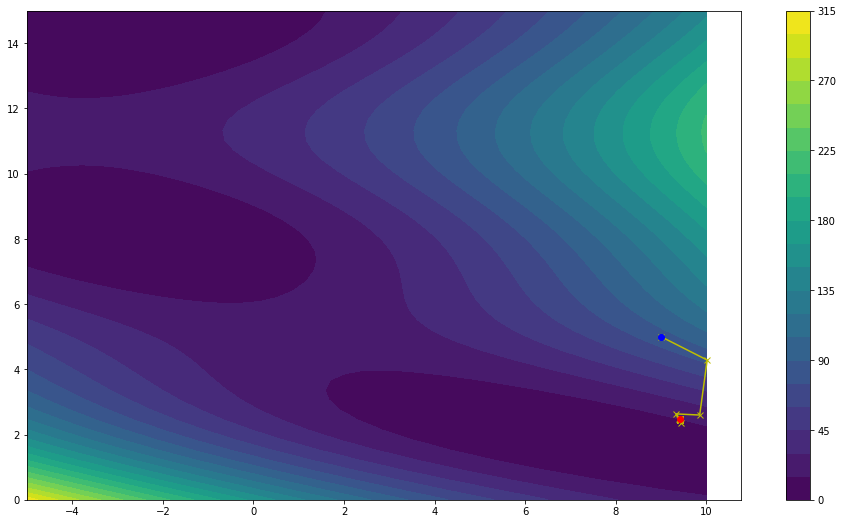

Total Iteration
17


In [ ]:
init_x = np.array([[9,5]]) #Initial point
print(init_x)

# Solve the Branin function by using QN method
output  = quasi_newton (
    fun = Branin, grad = grad_Branin, inv_Hessian = inv_Hessian_BFGS, 
    initial_point = init_x, dimen = 2, n_iter = 1000, init_alpha = 1
)

# Post-processing
fopt = Branin(output.opt_x)
df_opt = grad_Branin(output.opt_x)
traject_f = Branin(output.traject)
iter = output.iter

fopt = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting the results
nplot = 50;
X = np.linspace(-5, 10, num=nplot)
Y = np.linspace(0, 15, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = Branin(XY)

cf = plt.contourf(Xplot, Yplot, Zplot, 25)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()
plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'bo')

plt.rcParams["figure.figsize"] = (16, 9)
plt.show()
print("Total Iteration")
print(iter)


---
### Example Quasi Newton #3: Revisiting Rosenbrock Function

As we have known before, the Rosenbrock function is known to be difficult to solve. In this example, we are going to show how "slow" the gradient descent method is compared to the Quasi-Newton method. Let's visit our enemy again but now we come with a new weapon.

The code below uses the same configuration as the one in the gradient descent method's example (notice that we redefine the Rosenbrock function because now we use a two-dimensional Numpy array).

In [ ]:
def rosenbrock_QN(
    x, dimen = 2, scale = 100
):

  x_shape = x.shape
  ns = x_shape[0]

  f = np.zeros(shape=[ ns, 1])

  for i in range(ns):
    f[i, 0] = 100*(x[i, 1] - x[i, 0]**2)**2 + (x[i, 0] - 1)**2

  f = f/scale
  return f

def grad_rosenbrock_QN(
    x, dimen = 2, scale = 100
):

  x_shape = x.shape
  ns = x_shape[0]

  df = np.zeros(shape = [ns, dimen])
  
  for i in range(ns):
 
    df[i, 0] = -400*x[i, 0]*(x[i, 1]- x[i, 0]**2) + 2*(x[i, 0] - 1)
    df[i, 1] = 200*(x[i, 1] - x[i, 0]**2)

  df = df/scale
  return df

xx = np.array([[5, 5]])
f = rosenbrock_QN(xx)
df = grad_rosenbrock_QN(xx)

print(f)
print(df)


[[40016.]]
[[40008. -4000.]]


Now let's solve Rosenbrock function by using the Quasi-Newton method, can you now find the optimal point?:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide


Optimum Value of f(x) and Optimum Point x
f(x) = [nan]
x = [[nan nan]]
df(x) = [[nan nan]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value


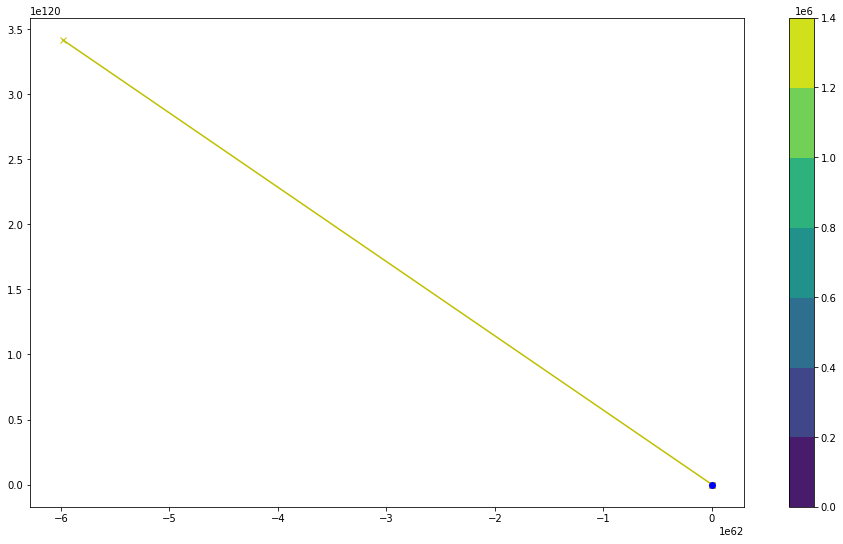

Total Iteration
1000


In [ ]:
init_x = np.array([[5, 5]]) # Initial solutions

# Solving the Rosenbrock problem with QN
output  = quasi_newton (
    fun = rosenbrock_QN, grad = grad_rosenbrock_QN, inv_Hessian = inv_Hessian_BFGS, 
    initial_point = init_x, dimen = 2, n_iter = 1000, init_alpha = 0.1, tol = 1e-6
)

# Post-processing teh results
fopt = rosenbrock_QN(output.opt_x)
df_opt = grad_rosenbrock_QN(output.opt_x)
traject_f = rosenbrock_QN(output.traject)
iter = output.iter

fopt = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")

# Plotting Results
nplot = 50;
X = np.linspace(-10, 10, num=nplot)
Y = np.linspace(-10, 10, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = rosenbrock_QN(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()
plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'bo')

plt.rcParams["figure.figsize"] = (16, 9)
plt.show()
print("Total Iteration")
print(iter)


---
---
## Active Set Method
**Reference:** https://optimization.mccormick.northwestern.edu/index.php/Sequential_quadratic_programming

It is worth noting that both of our previous methods do not consider any form of constraint at all. However, many problems have constraints, either equality or inequality constraints. In this case, we are now going to explain an optimization method that can solve constrained problems. Consider the following optimization problem:

minimize $f(x)$

over $ x \in \mathbb{R}^n$

subject to $\mathbf{h}(\mathbf{x}) = \mathbf{0}, \mathbf{g}(\mathbf{x}) \leq \mathbf{0} $

Recall the Quasi-Newton's method to find local optimum:

$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{H}_f(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k) $

All we need to do is to incorporate constraints into the above equation. To do so, consider the following Lagrangian 

$ L = f(\mathbf{x}) + \Sigma_{i=1}^m  \lambda_i h_i (\mathbf{x}) + \Sigma_{j=1}^l  \mu_j g_j (\mathbf{x}) $

By incorporating the Lagrange $L$ into the Quasi-Newton's method, we will get

$ \begin{pmatrix} \mathbf{x}_{k+1} \\\ \mathbf{\lambda}_{k+1} \\\ \mathbf{\mu}_{k+1} \end{pmatrix} = \begin{pmatrix} \mathbf{x}_{k} \\\ \mathbf{\lambda}_{k} \\\ \mathbf{\mu}_{k} \end{pmatrix} + \alpha_k ( \nabla^2 L_k ) ^{-1} \nabla L_k $

where

$ \nabla L_k = \begin{pmatrix} \nabla f + \mathbf{\lambda} \nabla h + \mathbf{\mu} \nabla g^* \\\ h \\\ g^* \end{pmatrix}$

$  \nabla^2 L_k  = \begin{pmatrix} \mathbf{H}_f & \nabla h & \nabla g^* \\\ \nabla h^T & 0 & 0 \\\ \nabla g^{*T} & 0 & 0 \end{pmatrix} $

The asterisk $*$ denotes the active inequality constraints during the iteration process. The whole iteration step is analogous to the Quasi-Newton method.

In this tutorial, we are going to use the "Active Set Method" to handle the constraints. The term "active constraint" means that the inequality constraint is violated in the current iteration step, and should be computed in the next iteration. If the inequality constraint is not violated, then it is deemed as "inactive" and can be excluded in the next iteration step. Equality constraints on the other hand are always deemed as "active" and will always be computed during the iteration process.

The term $\alpha_k$ and Hessian matrix $ \mathbf{H}_f $ are computed in the same fashion as in the Quasi-Newton method. However, the optimal criteria for a constrained problem are more challenging than non-constrained problems. If $\mathbf{x}^*$ is a local optimum, then the following conditions should be satisfied.

$ \nabla f(\mathbf{x}^*) +  \Sigma_{i=1}^m  \lambda_i \nabla h_i (\mathbf{x}) + \Sigma_{j=1}^l  \mu_j \nabla g_j (\mathbf{x}) = \mathbf{0} $

and $\mathbf{h}(\mathbf{x}) = \mathbf{0}, \mathbf{g}(\mathbf{x}) \leq \mathbf{0} $

Now that every mathematical term has been defined properly, all that needs to do is setting up the initial guess for the method. All of the initial parameters are set up in a similar fashion with the Quasi-Newton method, but we also need to provide initial values for the Lagrange multipliers $\lambda$ and $\mu$. Most of the time, it is sufficient to set 1 as the initial value of the Lagrange multiplier. The method can be worked from the initial guess and then will converge to the nearest local minimum that satisfy the optimal criteria.



---
---
### Active Set Method Code

In this code, both the constraints and the derivative of the constraints are calculated outside of the main subroutine of the code. Hence it requires more inputs (that is, the constraints values) than the Quasi-Newton methods.

In [ ]:
def Lagrange(
    x, fun, grad_fun, eq_cons, ineq_cons, del_eq, del_ineq, B, dimen, num_eq, num_ineq
):

  #eq_Lcons = eq_cons(x)
  #ineq_Lcons = ineq_cons(x)
  #assuming linear constraints
  #assuming linear constraints

  ineq_size = ineq_cons.size
  eq_size = eq_cons.size

  num_del = dimen+num_eq+num_ineq 

  del_L = np.zeros(shape=[1, num_del])
  xf = x[0, 0:dimen].reshape(1, dimen)
  if eq_size > 0:
    lamda = x[0, dimen:(dimen+num_eq)].reshape(1, num_eq)
  
  if ineq_size > 0:
    mu = x[0, (dimen+num_eq): (dimen+num_eq+num_ineq)].reshape(1, num_ineq) 

  del_f = grad_fun(xf)

  # first part
  temp_del = np.zeros(shape=[1, dimen])
  
  if ineq_size > 0:
    for j in range(ineq_size):
      temp_del = temp_del + del_ineq[j, :]*mu[0, j]
  
  if eq_size > 0:
    for j in range(eq_size):
      temp_del = temp_del + del_eq[j, :]*lamda[0, j]

  del_L[:, 0:dimen] = del_f + temp_del

  # second part
  if eq_size > 0:
    del_L[:, dimen:(dimen+num_eq)] = eq_cons

  # third part
  if ineq_size > 0:
    del_L[:, (dimen+num_eq):(num_del)] = ineq_cons

  del2_L = np.zeros(shape = [num_del, num_del])
  del2_f = B
  
  # first part (Hessian)
  del2_L[0:dimen, 0:dimen] = del2_f
  
  # second part (column constraint)

  if eq_size > 0:
    del2_L[0:dimen, dimen:(dimen+num_eq)] = np.transpose(del_eq)

  if ineq_size > 0:
    del2_L[0:dimen, (dimen+num_eq):(dimen+num_eq+num_ineq)] = np.transpose(del_ineq)

  # third part (row constraint)
  if eq_size > 0:  
    del2_L[dimen:(dimen+num_eq), 0:dimen] = (del_eq)

  if ineq_size > 0:
    del2_L[(dimen+num_eq):(dimen+num_eq+num_ineq), 0:dimen] = (del_ineq)

  return del_L, del2_L

def Active_QN (
    fun, grad, Hessian, fun_eq_cons, fun_ineq_cons, grad_eq_cons, grad_ineq_cons, initial_point, dimen, n_iter = 100, init_alpha = 1, tol = 1e-03
):

  x_point = np.zeros(shape = [n_iter, dimen])
  x_point[0, :] = initial_point
  
  num_eq = fun_eq_cons(initial_point.reshape(1, dimen)).shape[0]
  num_ineq = fun_ineq_cons(initial_point.reshape(1, dimen)).shape[0]
  num_del = dimen + num_eq + num_ineq

  lamda_point = 1*np.ones(shape = [n_iter, num_eq])
  mu_point = 1*np.ones(shape = [n_iter, num_ineq])

  for i in range(n_iter):

    x0 = x_point[i, :].reshape(1, dimen)
    lam0 = lamda_point[i, :].reshape(1, num_eq)
    mu0 = mu_point[i, :].reshape(1, num_ineq)

    lm0 = np.append(lam0, mu0).reshape(1,num_eq+num_ineq)
    xk0 = np.append(x0, lm0)
    xk0 = xk0.reshape(1, num_del)
    # compute Hessian inverse
    #print("Computing Hessian matrix...")

    #check active inequality constraints
    active_set = np.zeros(shape=[num_ineq])
    ineq_val = fun_ineq_cons(x0)
    
    count_active = 0;
    for j in range(num_ineq):
      if ineq_val[j, 0] > 0:
        active_set[j] = 1
        count_active = count_active + 1  
      
    if count_active > 0:
        
      active_ineq = np.zeros(shape = [count_active])
      ineq_cons = fun_ineq_cons(x0)
      del_ineq = grad_ineq_cons(x0)
      active_del_ineq = np.zeros(shape = [count_active, dimen])
      
    else:
      active_ineq = np.array([])
      active_del_ineq = np.array([[]])

    ca = 0
    for j in range(num_ineq):
      if active_set[j] == 1:
        active_ineq[ca] = ineq_cons[j]
        active_del_ineq[ca, :] = del_ineq[j, :]
        ca = ca+1

    #equality constraints
    eq_cons = fun_eq_cons(x0)
    del_eq = grad_eq_cons(x0)

    if i > 0:
      
      y0 = np.transpose(grad(x0) - grad(x_point[i-1, :].reshape(1, dimen)))
      #compute lagrange

      #compute hessian
      B1inv = Hessian(del_x, y0, B0, dimen)
      B1 = np.linalg.inv(B1inv)

      #compute grad lagrange
      
      del_L, del2_L = Lagrange(xk0, fun, grad, eq_cons, active_ineq, del_eq, active_del_ineq, B1, dimen, num_eq, count_active)
      dLt = np.transpose(del_L)
      
      pk0 = -1*np.matmul(np.linalg.inv(del2_L), dLt)
      
    else:
      B1 = np.identity(dimen)
      
      del_L, del2_L = Lagrange(xk0, fun, grad, eq_cons, active_ineq, del_eq, active_del_ineq, B1, dimen, num_eq, count_active)
      dLt = np.transpose(del_L)
      pk0 = -1*np.matmul(np.linalg.inv(del2_L), dLt)

    # set alpha
    #print("Checking alpha for Wolfie conditions...")
    alpha = init_alpha
    p0 = pk0[0:dimen, 0]
    check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)

    for k in range(10):
      if check == 0:
        alpha = 0.5*alpha
        check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)
      else:
        break

    # compute temporary search direction
    
    del_xk_temp = alpha*pk0
    num_active = num_eq + count_active
    del_xk_temp = del_xk_temp.reshape(1, dimen + num_active)
    
    del_xtemp = del_xk_temp[0, 0:dimen]
        
    # check feasiblity of the next step
    temp_x = del_xtemp + x_point[i, :]
    temp_x = temp_x.reshape(1, dimen)
    ineq_temp= fun_ineq_cons(temp_x)

    count_active = 0;
    for j in range(num_ineq):
      if ineq_temp[j, 0] > 0:
        active_set[j] = 1
        count_active = count_active + 1
    
    # if the next step violates contraint(s), recompute search direction
    if count_active > 0:
      active_ineq = np.zeros(shape = [count_active])
      ineq_cons = fun_ineq_cons(x0)
      del_ineq = grad_ineq_cons(x0)
      active_del_ineq = np.zeros(shape = [count_active, dimen])

      ca = 0
      for j in range(num_ineq):
        if active_set[j] == 1:
          active_ineq[ca] = ineq_cons[j]
          active_del_ineq[ca, :] = del_ineq[j, :]
          ca = ca+1

      eq_cons = fun_eq_cons(x0)
      del_eq = grad_eq_cons(x0)

      #y0 = np.transpose(grad(temp_x) - grad(x0))
      y0 = np.transpose(grad(x0) - grad(x_point[i-1, :].reshape(1, dimen)))
      #compute lagrange

      #compute hessian
      if i == 0:
        B1 = np.identity(dimen)
      else:
        B1inv = Hessian(del_x, y0, B0, dimen)
        B1 = np.linalg.inv(B1inv)      

      #compute grad lagrange
      del_L, del2_L = Lagrange(xk0, fun, grad, eq_cons, active_ineq, del_eq, active_del_ineq, B1, dimen, num_eq, count_active)
      dLt = np.transpose(del_L)
      
      pk0 = -1*np.matmul(np.linalg.inv(del2_L), dLt)

      #recompute alpha
      alpha = init_alpha
      p0 = pk0[0:dimen, 0]
      check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)

      for k in range(10):
        if check == 0:
          alpha = 0.5*alpha
          check = check_Wolfie(p0, x0, grad, fun, alpha, dimen)
        else:
          break

    #compute the constrained search direction
    del_xk = alpha*pk0
    num_active = num_eq + count_active
    del_xk = del_xk.reshape(1, dimen + num_active)
    
    del_x = del_xk[0, 0:dimen]

    if num_eq > 0:
      del_lamda = del_xk[0, dimen:(dimen+num_eq)]

    if num_ineq > 0:
      if count_active > 0:
        del_temp = del_xk[0, (dimen+num_eq):(dimen+num_active)].reshape(1, count_active)
        
        del_mu = np.zeros(shape = [1, num_ineq])
        ca = 0
        for j in range(num_ineq):
          if active_set[j] == 1:
            del_mu[0, j] = del_temp[0, ca]
            ca = ca+1

      else:
        del_mu = np.zeros(shape=[1, num_ineq])


    # check optimal criteria and save current updated Hessian apprx.
    B0 = B1
    grad_check = np.sum(np.abs(del_L))
    
    if grad_check <= tol or i == n_iter - 1:

      class result:
        def __init__(self):
          self.opt_x = x_point[i, :].reshape([1, dimen])
          self.traject = x_point
          self.iter = i+1
          self.kkt = grad_check
          if num_eq > 0:
            self.lamda_trj = lamda_point
          if num_ineq > 0:
            self.mu_trj = mu_point

      def get_result():
        return result()

      output = get_result()
      break
    else:
      x_point[i+1, :] = x_point[i ,:] + del_x

      if num_eq > 0:
        lamda_point[i+1, :] = lamda_point[i, :] + del_lamda
      
      if num_ineq > 0:
        mu_point[i+1, :] = mu_point[i, :] + del_mu

  return output

---
### Example Active Set Method #1: Parabolic Function with Inequality Constraints

Given the following parabolic problem:

minimize $f(\mathbf{x}) = x_1^2 + x_2^2 $

subject to $ x_1 + x_2 \leq -2$

Notice that we now include an inequality constraint. The unconstrained global optimum without constraint of this function lies outside of the feasible region, so we have to find the feasible optimum solution. We need to first define the inequality constraint:

In [ ]:
def cons_ineq_1(x):
  x_shape = x.shape
  ns = x_shape[0]

  f = np.zeros(shape=[ns, 1]) 
  for i in range(ns):
    f[i, :] = x[i, 0] + x[i, 1] + 2

  return f

 and its first derivative

In [ ]:
def grad_cons_ineq_1(x, dimen = 2):

  x_shape = x.shape
  ns = x_shape[0]

  df = np.zeros(shape=[ns, dimen])
  for i in range(ns):
    for j in range(dimen):
       df[i,j] = 1

  return df


Because we do not have equality constraints for now, we will set it to an empty array to tell our program that no equality constraints exist.

In [ ]:
def empty_array(x):
  f = np.array([])

  return f

All good. Now let's solve the constrained parabolic function:

Optimum Value of f(x) and Optimum Point x
f(x) = [[2.80930024]]
x = [[-1.63569967 -0.36576883]]
df(x) = [[-3.27139934 -0.73153767]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value

 The white dot represents the unconstrained optimum

 The optimal criteria value
2.5413301726467084


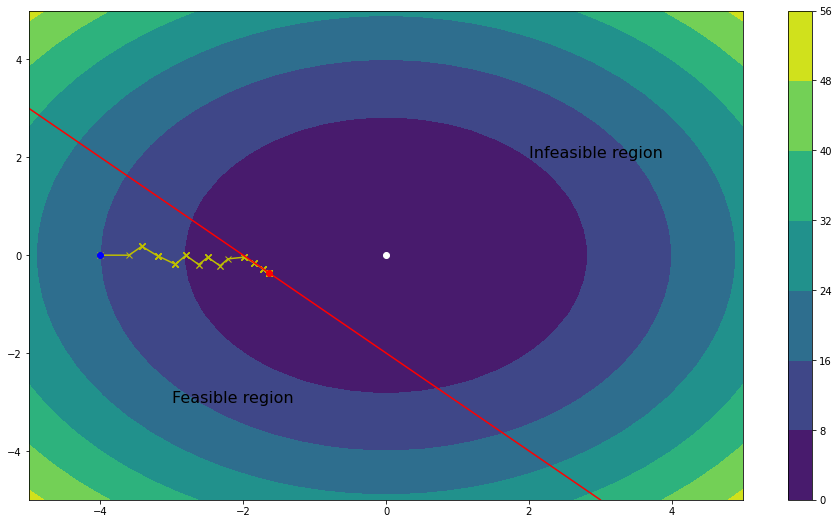

Total Iteration
100


In [ ]:
init_x = np.array([[-4, 0]])

output  = Active_QN (
    fun = ND_parabolic, grad = grad_NDparabolic, Hessian = inv_Hessian_BFGS, 
    fun_eq_cons = empty_array, fun_ineq_cons = cons_ineq_1, 
    grad_eq_cons = empty_array, grad_ineq_cons = grad_cons_ineq_1, 
    initial_point = init_x, dimen = 2, n_iter = 100, init_alpha = 0.05
)

fopt = ND_parabolic(output.opt_x)
df_opt = grad_NDparabolic(output.opt_x)
traject_f = ND_parabolic(output.traject)
iter = output.iter

fopr = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")
print("\n The white dot represents the unconstrained optimum")
print("\n The optimal criteria value")
print(output.kkt)

# Plotting Results
nplot = 30;
X = np.linspace(-5, 5, num=nplot)
Y = np.linspace(-5, 5, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = ND_parabolic(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()

plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'bo')
plt.plot(0, 0, 'wo')

#plot constraints
xcons = np.array([[-5, 3], [3, -5]])

plt.plot(xcons[:, 0], xcons[:, 1], 'r')


plt.rcParams["figure.figsize"] = (16, 9)
plt.text(-3, -3, "Feasible region", fontsize=16)
plt.text(2, 2, "Infeasible region", fontsize=16)
plt.show()
print("Total Iteration")
print(iter)

#print("Trajectory")
#print(output.traject)


---
### Example Active Set Method #2: Parabolic Function with Inequality Constraints (different constraint):

Given the following problem

minimize $f(\mathbf{x}) = x_1^2 + x_2^2 $

subject to $ x_1 + x_2 \leq 2$

The global optimum without constraint lies within of the feasible region. Notice that we change the threshold for the inequality constraint. Therefore the global optimum is the same with that of the unconstrained parabolic function. Execute the following cell to create our new constraint:

In [ ]:
def cons_ineq_2(x):
  x_shape = x.shape
  ns = x_shape[0]

  f = np.zeros(shape=[ns, 1]) 
  for i in range(ns):
    f[i, :] = x[i, 0] + x[i, 1] - 2
  return f

And solve it:

Optimum Value of f(x) and Optimum Point x
f(x) = [[0.]]
x = [[0. 0.]]
df(x) = [[0. 0.]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value

 The white dot represents the unconstrained optimum

 The optimal criteria value
0.0


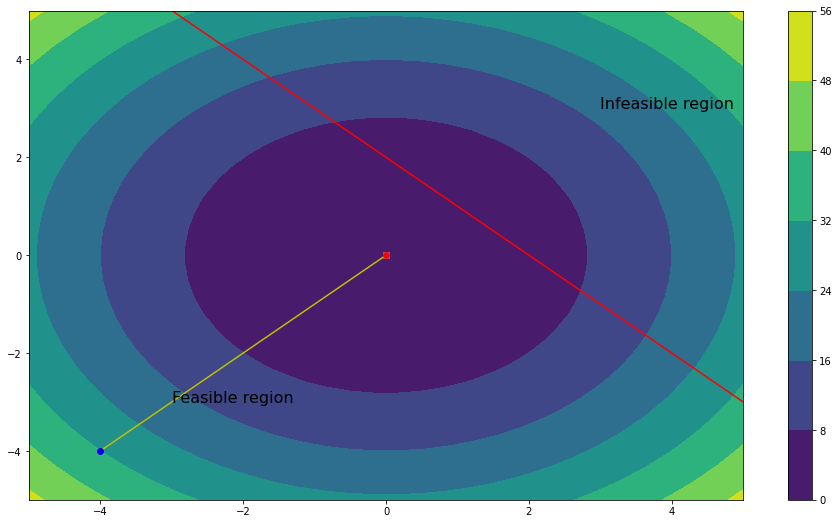

Total Iteration
2


In [ ]:
init_x = np.array([[-4, -4]]) # Initial solution

# Solving the parabolic problem with QN method
output  = Active_QN (
    fun = ND_parabolic, grad = grad_NDparabolic, Hessian = inv_Hessian_BFGS, 
    fun_eq_cons = empty_array, fun_ineq_cons = cons_ineq_2, 
    grad_eq_cons = empty_array, grad_ineq_cons = grad_cons_ineq_1, 
    initial_point = init_x, dimen = 2, n_iter = 1000, init_alpha = 0.5
)

# Post-processing
fopt = ND_parabolic(output.opt_x)
df_opt = grad_NDparabolic(output.opt_x)
traject_f = ND_parabolic(output.traject)
iter = output.iter

fopr = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")
print("\n The white dot represents the unconstrained optimum")

print("\n The optimal criteria value")
print(output.kkt)

# Plotting Results
nplot = 30;
X = np.linspace(-5, 5, num=nplot)
Y = np.linspace(-5, 5, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = ND_parabolic(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)

plt.colorbar()
plt.plot(0, 0, 'wo')
plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'bo')


#plot constraints
xcons = np.array([[5, -3], [-3, 5]])
plt.plot(xcons[:, 0], xcons[:, 1], 'r')
plt.rcParams["figure.figsize"] = (16, 9)
plt.text(-3, -3, "Feasible region", fontsize=16)
plt.text(3, 3, "Infeasible region", fontsize=16)
plt.show()
print("Total Iteration")
print(iter)

#print("Trajectory")
#print(output.traject)


---
### Example SQP #3: Parabolic Function with Equality Constraints
Now let's try something different, how about if we solve a problem with equality constraint?

Given the following problem:

minimize $f(\mathbf{x}) = x_1^2 + x_2^2 $

subject to $ x_1 + x_2 = 1$

In this case the constraint is set to equality constraint

In [ ]:
def cons_eq_1(x):
  x_shape = x.shape
  ns = x_shape[0]

  f = np.zeros(shape=[ns, 1]) 
  for i in range(ns):
    f[i, :] = x[i, 0] + x[i, 1] - 1

  return f

def grad_cons_eq_1(x, dimen = 2):

  x_shape = x.shape
  ns = x_shape[0]

  df = np.zeros(shape=[ns, dimen])
  for i in range(ns):
    for j in range(dimen):
       df[i,j] = 1

  return df

The following cell solves the already defined equality constrained problem:

Optimum Value of f(x) and Optimum Point x
f(x) = [[0.51060073]]
x = [[0.5728036 0.4271964]]
df(x) = [[1.1456072 0.8543928]]

 The blue dot represents the initial point

 The yellow dots represent the optimization trajectory

 The red dot represents the obtained minimum value

 The white dot represents the unconstrained optimum

 The optimal criteria value
0.29121439578841024


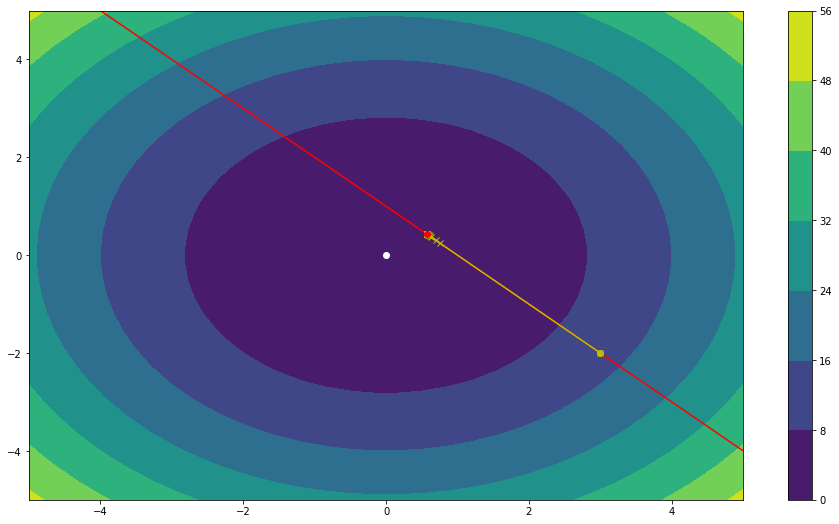

Total Iteration
1000
Trajectory
[[ 3.         -2.        ]
 [ 0.75        0.25      ]
 [ 0.69375     0.30625   ]
 ...
 [ 0.57280373  0.42719627]
 [ 0.57280366  0.42719634]
 [ 0.5728036   0.4271964 ]]


In [ ]:
init_x = np.array([[3, -2]]) # Initial point

output  = Active_QN (
    fun = ND_parabolic, grad = grad_NDparabolic, Hessian = inv_Hessian_BFGS, fun_eq_cons = cons_eq_1, fun_ineq_cons = empty_array, 
    grad_eq_cons = grad_cons_eq_1, grad_ineq_cons = empty_array, initial_point = init_x, dimen = 2, n_iter = 1000, init_alpha = 0.45
)

fopt = ND_parabolic(output.opt_x)
df_opt = grad_NDparabolic(output.opt_x)
traject_f = ND_parabolic(output.traject)
iter = output.iter

fopr = fopt.reshape(1)
#traject_f = traject_f.reshape(iter, 2)

print("Optimum Value of f(x) and Optimum Point x")
txt_f = "f(x) = {}"
txt_x = "x = {}"
txt_df_opt = "df(x) = {}"
print(txt_f.format(fopt))
print(txt_x.format(output.opt_x))
print(txt_df_opt.format(df_opt))
print("\n The blue dot represents the initial point")
print("\n The yellow dots represent the optimization trajectory")
print("\n The red dot represents the obtained minimum value")
print("\n The white dot represents the unconstrained optimum")

print("\n The optimal criteria value")
print(output.kkt)

# Plotting Results
nplot = 30;
X = np.linspace(-5, 5, num=nplot)
Y = np.linspace(-5, 5, num=nplot)
Xplot, Yplot = np.meshgrid(X, Y)
Zplot = np.zeros(shape=[nplot, nplot])

for i in range(nplot):
  for j in range(nplot):
    XY = np.zeros(shape=[1,2])
    XY[0,0] = X[i]
    XY[0,1] = Y[j]
    Zplot[i, j] = ND_parabolic(XY)

cf = plt.contourf(Xplot, Yplot, Zplot)
#plt.pcolor(Xplot, Yplot, Zplot,  vmin = -50, vmax = 300)



#plot constraints
xcons = np.array([[-4, 5], [5, -4]])
plt.plot(xcons[:, 0], xcons[:, 1], 'r')
plt.rcParams["figure.figsize"] = (16, 9)

plt.colorbar()
plt.plot(0, 0, 'wo')
plt.plot(output.traject[0:iter,0], output.traject[0:iter,1], 'yx-')
plt.plot(output.opt_x[0,0], output.opt_x[0,1], 'ro')
plt.plot(init_x[0,0], init_x[0,1], 'yo')

plt.show()
print("Total Iteration")
print(iter)

print("Trajectory")
print(output.traject)


---
---
## Limitations and More Advanced Techniques

All of the methods discussed above are examples of classical gradient-based optimization techniques. There are other more advanced techniques capable of handling specific difficult problems efficiently. Techniques such active set method, which we used in this tutorial to handle constraints, have some important limitations. The method explained in this paper is not efficient for a large-scale system. However, the main limitation is that the method does not have any guarantee that the Hessian of the Lagrange will always be invertible. One of the methods to tackle this problem is called Sequential Quadratic Programming (SQP) where it approximates the search direction with a second-order Taylor expansion, thus making it a quadratic minimization sub-problem. 

There are also some variations of the Hessian matrix approximation. Other methods such as Sequential Linear Programming, Augmented Lagrangian Method, and Interior Point Method have their advantages and disadvantages too. Most of these methods have been efficiently implemented in open-source packages such as SciPy (for Python), NLopt (for C/C++), and SNOPT (for Fortran). The lesson here is to know which method is the most suitable for your application by learning the theoretical foundation of those methods.

---
--- 